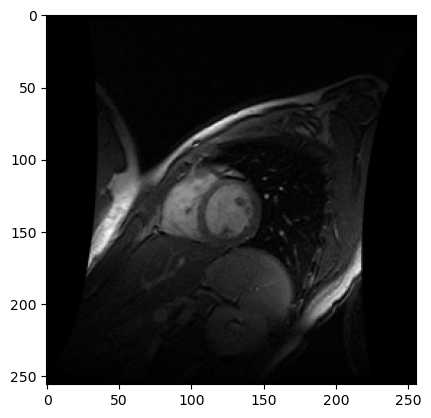

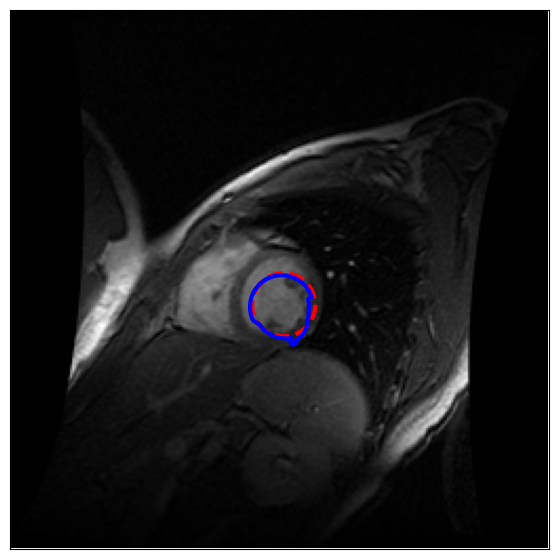

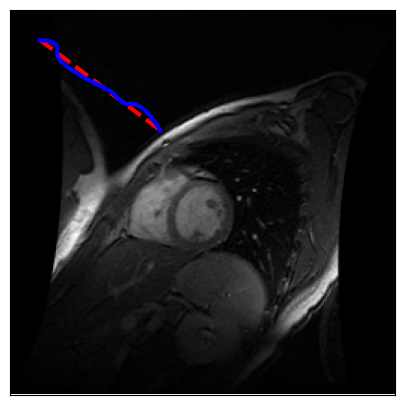

/tmp/ipykernel_187785/481940347.py:96: FutureWarning: `max_iter` is a deprecated argument name for `chan_vese`. It will be removed in version 1.0. Please use `max_num_iter` instead.
  cv = chan_vese(image, mu=0.25, lambda1=5, lambda2=1, tol=1e-3, max_iter=200,


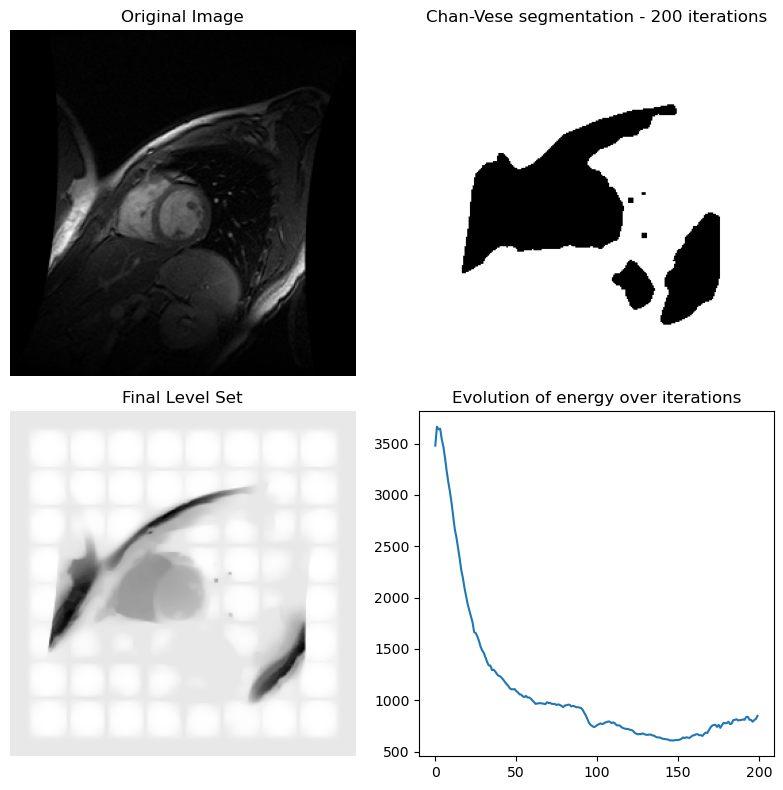

In [7]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
""" I. Bloch
"""


#%% SECTION 1 inclusion of packages 


import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
# necessite scikit-image 
from skimage import io as skio
from skimage.filters import gaussian
from skimage.segmentation import active_contour
from skimage import img_as_float
from skimage.segmentation import chan_vese
from skimage.segmentation import checkerboard_level_set
from skimage.segmentation import disk_level_set

#%% SECTION 2 - Input image

im=skio.imread('coeurIRM.bmp')

#im=skio.imread('retineOA.bmp')

#im=skio.imread('brain.bmp')
#im=im[:,:,1]

#im=skio.imread('brain2.bmp')

plt.imshow(im, cmap="gray", vmin=0, vmax=255)

#%% SECTION 3a - Segmentation using active contours 

s = np.linspace(0, 2*np.pi, 100)
r = 140 + 15*np.sin(s)
c = 130 + 15*np.cos(s)
init = np.array([r, c]).T

snake = active_contour(gaussian(im, 0.1),
                       init, alpha=0.5, beta=5, w_edge=20, gamma=0.001)

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(im, cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, im.shape[1], im.shape[0], 0])

plt.show()

#%% SECTION 3b - Open contours

# Use retineOA.bmp

r = np.linspace(20, 80, 100)
c = np.linspace(20, 100, 100)
init = np.array([r, c]).T

snake = active_contour(gaussian(im, 1), init, boundary_condition='fixed',
                       alpha=0.01, beta=2, w_line=0, w_edge=10, gamma=0.01)

fig, ax = plt.subplots(figsize=(9, 5))
ax.imshow(im, cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, im.shape[1], im.shape[0], 0])

plt.show()

#%% SECTION 4 - Segmentation using level sets (and region homogeneity)

image = img_as_float(im)

# Init avec un damier
#init_ls = checkerboard_level_set(image.shape, 6)

# Init avec un cercle
#init_ls = circle_level_set (image.shape, (120,130), 10)

# Init avec plusieurs cercles
circleNum = 8
circleRadius = image.shape[0] / (3*circleNum)
circleStep0 = image.shape[0]/(circleNum+1)
circleStep1 = image.shape[1]/(circleNum+1)
init_ls = np.zeros(image.shape)
for i in range(circleNum):
        for j in range(circleNum):
            init_ls = init_ls + disk_level_set (image.shape, 
                                                  center=((i+1)*circleStep0, (j+1)*circleStep1), radius=circleRadius)


cv = chan_vese(image, mu=0.25, lambda1=5, lambda2=1, tol=1e-3, max_iter=200,
               dt=0.5, init_level_set=init_ls, extended_output=True)

fig, axes = plt.subplots(2, 2, figsize=(8, 8))
ax = axes.flatten()

ax[0].imshow(image, cmap="gray")
ax[0].set_axis_off()
ax[0].set_title("Original Image", fontsize=12)

ax[1].imshow(cv[0], cmap="gray")
ax[1].set_axis_off()
title = "Chan-Vese segmentation - {} iterations".format(len(cv[2]))
ax[1].set_title(title, fontsize=12)

ax[2].imshow(cv[1], cmap="gray")
ax[2].set_axis_off()
ax[2].set_title("Final Level Set", fontsize=12)

ax[3].plot(cv[2])
ax[3].set_title("Evolution of energy over iterations", fontsize=12)

fig.tight_layout()
plt.show()

     
#%% END  TP - Deformable Models
